# The Sparks Foundation - Internship
### Data Science and Business Analytics

## Sidharth S N

Task 3: Explore the SampleSuperstore dataset and try to findout the weak areas where you can work to make profits.

***

Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

***

Getting the dataset

In [2]:
data = pd.read_csv('SampleSuperstore.csv')

In [3]:
data.head()                # Viewing first 5 elements of dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.duplicated().sum()

17

In [6]:
data.drop_duplicates()
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


***

Visualizations of the dataset

In [7]:
import seaborn as sbn

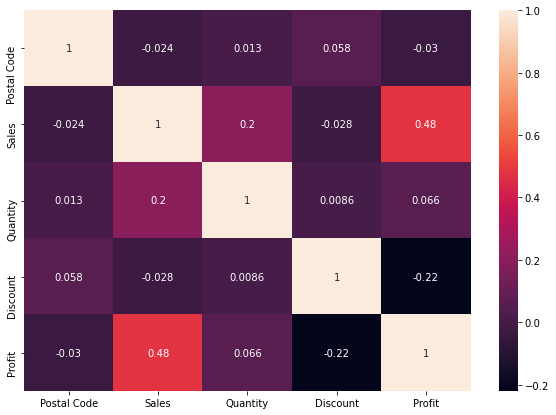

In [8]:
# Heatmap
cor = data.corr()
plt.figure(figsize=(10,7))
sbn.heatmap(cor, annot=True)

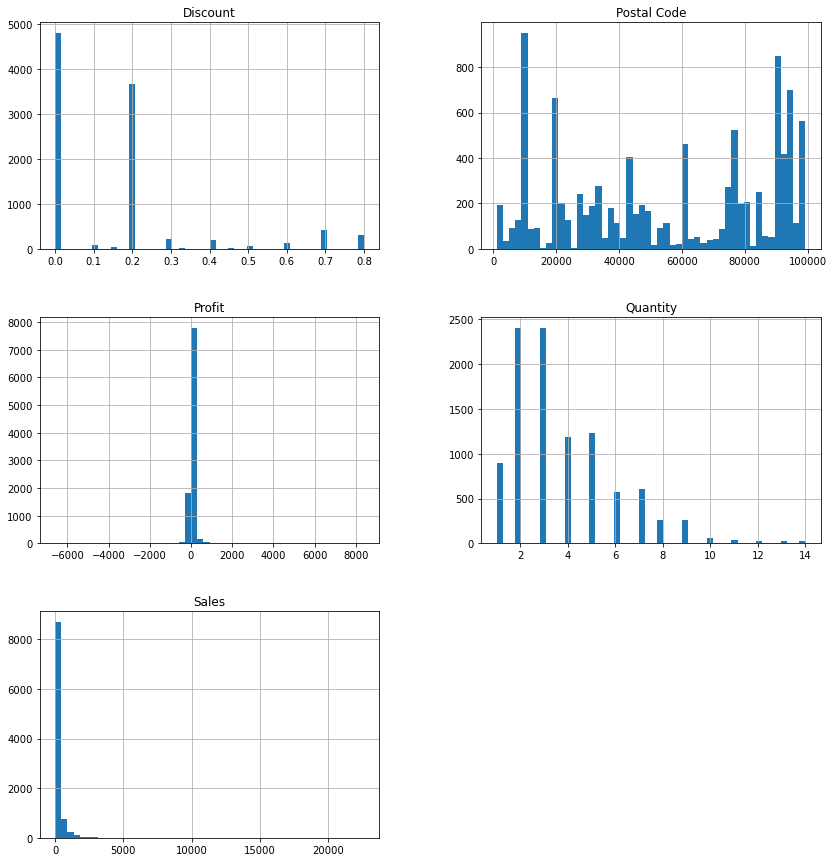

In [9]:
# Histogram
data.hist(figsize=(14,15), bins=50)
plt.show()

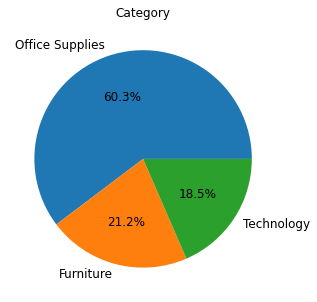

In [10]:
# Pie chart
plt.figure(figsize = (5,5))
plt.title('Category')
plt.pie(data['Category'].value_counts(), labels=data['Category'].value_counts().index,autopct='%1.1f%%', textprops = {"fontsize":12})
plt.show()

In [11]:
# computing top categories in terms of sales from first 100 observations
top_category_s = data.groupby("Category").Sales.sum().nlargest(n=100)

# computing top categories in terms of profit from first 100 observations
top_category_p = data.groupby("Category").Profit.sum().nlargest(n=100)

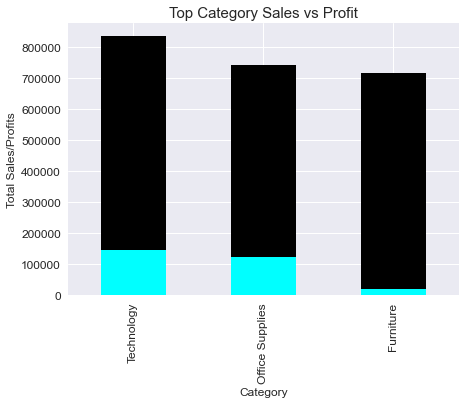

In [12]:
# plotting to see it visually
plt.style.use('seaborn')
top_category_s.plot(kind = 'bar',figsize = (7,5),fontsize = 12, color='black')
top_category_p.plot(kind = 'bar',figsize = (7,5),fontsize = 12,color='cyan')
plt.xlabel('Category',fontsize = 12)
plt.ylabel('Total Sales/Profits',fontsize = 12)
plt.title("Top Category Sales vs Profit",fontsize = 15)
plt.show()

Visualising the sub categories

In [13]:
# computing top sub-categories in terms of sales from first 100 observations
top_subcategory_s = data.groupby("Sub-Category").Sales.sum().nlargest(n = 100)

# computing top sub-categories in terms of profit from first 100 observations
top_subcategory_p = data.groupby("Sub-Category").Profit.sum().nlargest(n = 100)

Text(0.5, 1.0, 'Top Sub-Category Sales vs Profit')

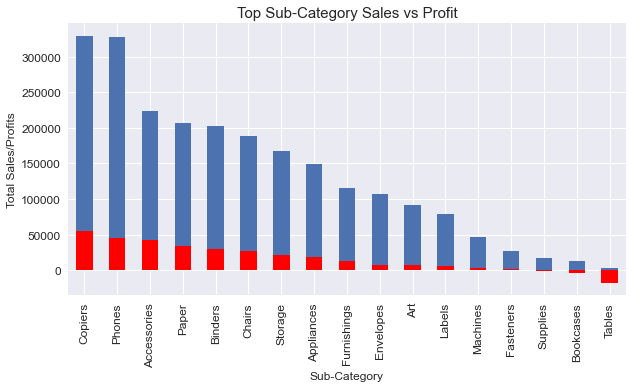

In [14]:
# plotting to see it visually
top_subcategory_s.plot(kind = 'bar',figsize = (10,5),fontsize = 12)
top_subcategory_p.plot(kind = 'bar',figsize = (10,5),fontsize = 12, color = 'red')
plt.xlabel('Sub-Category',fontsize = 12)
plt.ylabel('Total Sales/Profits',fontsize = 12)
plt.title("Top Sub-Category Sales vs Profit",fontsize = 15)

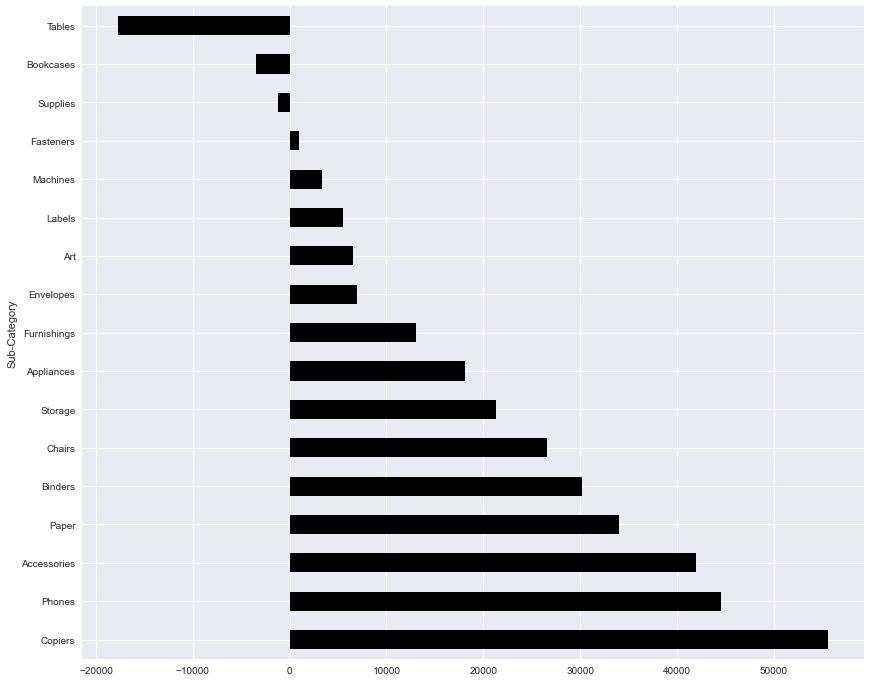

In [15]:
# A more detailed view
plt.figure(figsize=(14,12))
statewise = data.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh(color='black') # h for horizontal

The above graph clearly shows that Copiers and Phones have the highest sales and profit and tables has negative profit

Visualising the discount

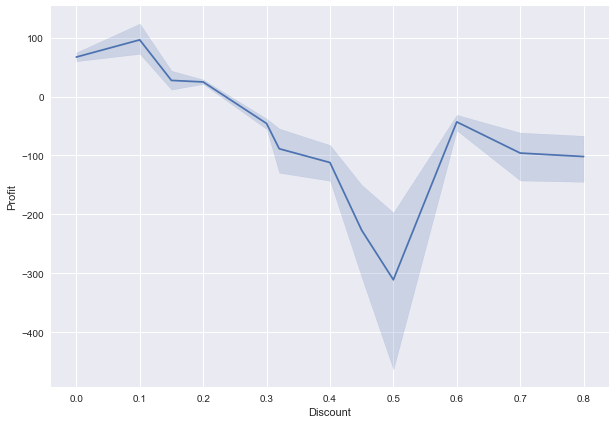

In [16]:
# Visualizing
plt.figure(figsize=(10,7))
sbn.lineplot(data['Discount'], data['Profit'])

The above plot shows that when the there is no discount the profit is more and as the discount increases the profit decreases

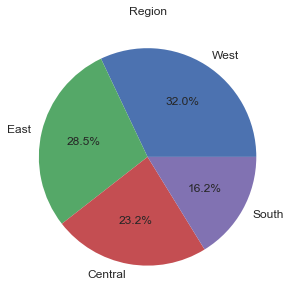

In [17]:
#Visualizing the Sales vs Profits of different Regions
plt.figure(figsize = (5,5))
plt.title('Region')
plt.pie(data['Region'].value_counts(), labels=data['Region'].value_counts().index,autopct='%1.1f%%', textprops = {"fontsize":12})
plt.show()

The pie chart shows that West and East have same Profit though sales in the East are less as compared to West.

Visualising the Sales vs Profits in different states

In [18]:
# computing top states in terms of sales from first 10 observations
top_states_s = data.groupby("State").Sales.sum().nlargest(n=10)

# computing top states in terms of profit from first 10 observations
top_states_p = data.groupby("State").Profit.sum().nlargest(n = 10)

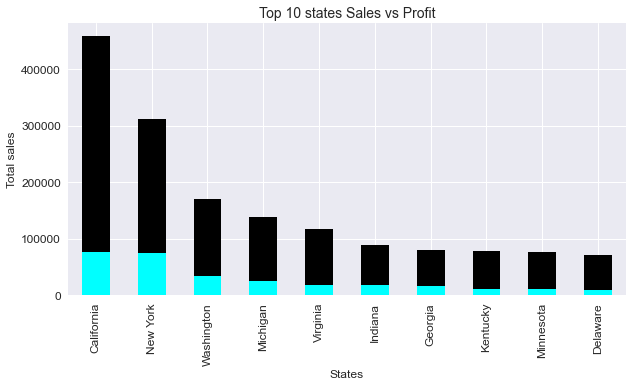

In [19]:
#Visualizing
top_states_s.plot(kind = 'bar',figsize = (10,5),fontsize = 12,  color = 'black')
top_states_p.plot(kind = 'bar',figsize = (10,5),fontsize = 12, color = 'cyan')
plt.xlabel('States',fontsize = 12)
plt.ylabel('Total sales',fontsize = 12)
plt.title("Top 10 states Sales vs Profit",fontsize = 14)
plt.show()

Checking the interdependency of Sales,Profits and Discounts



Text(0.5, 1.0, 'Interdependency of Sales,Profits and Discounts')

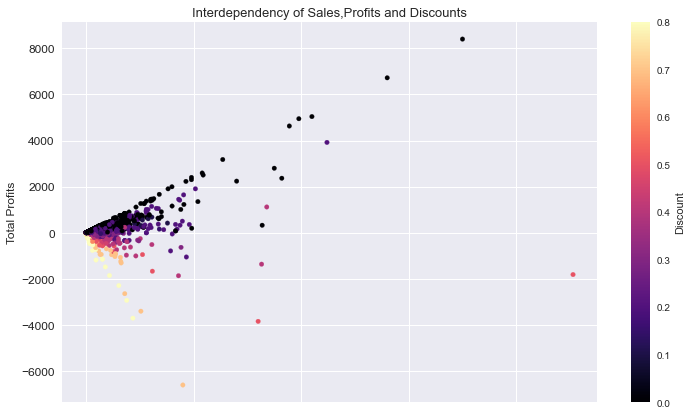

In [20]:
# Scatter Plot
data.plot(kind = "scatter",figsize = (12,7), x = "Sales", y= "Profit", c = "Discount", s = 20,fontsize = 12, colormap = "magma")
plt.ylabel('Total Profits',fontsize = 12)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 13)

The graph clearly shows that if we give more Discount on our products sales increases but profit decreases.

***

## Conclusion :

The weak areas where one can work to make more profit are :

1. We should limit sales of furniture and increase that of technology and office suppliers as furniture has very less profit as compared to sales.


2. We should concentrate on the states like 'New York' and 'California' to make more profits.


3. Increase sales more in the east as profit is more.


4. Considering the sub-categories sales of tables should be minimized.

***

Thank You:)